# Scraping data from the Internet

PS: another resource suggested during our practical session - https://github.com/cwerner/fastclass

## Images from the Google image search

We are using the **google-images-download** python library, however we need to clone a patched version from here: https://github.com/voins/google-images-download/tree/patch-1

See documentation for the commands: https://google-images-download.readthedocs.io/en/latest/examples.html#

In [0]:
# install this into this VM we have from Google via Google Colab:
!git clone -b patch-1 https://github.com/voins/google-images-download.git

In [0]:
%cd google-images-download
!python setup.py install
%cd /content/

In [0]:
!googleimagesdownload

-------------------------------
Uh oh! Keywords is a required argument 

Please refer to the documentation on guide to writing queries 
https://github.com/hardikvasa/google-images-download#examples

exiting!
-------------------------------


In [0]:
# Handy commands:
# --offset    When you specify this argument, it will skip the offset number of links before it starts downloading images
# --color	    Denotes the color filter that you want to apply to the images. Possible values: red, orange, yellow, green, teal, blue, purple, pink, white, gray, black, brown
# --size      Denotes the relative size of the image to be downloaded. Possible values: large, medium, icon, >400*300, >640*480, >800*600, >1024*768, >2MP, >4MP, >6MP, >8MP, >10MP, >12MP, >15MP, >20MP, >40MP, >70MP
# --time      Denotes the time the image was uploaded/indexed. Possible values: past-24-hours, past-7-days, past-month, past-year

# etc etc ... see: https://google-images-download.readthedocs.io/en/latest/arguments.html

In [0]:
!googleimagesdownload --keywords "new york" --limit 25 #--offset 100 #--size ">1024*768" --color "red"

In [0]:
!ls downloads

In [0]:
!ls "downloads/new york" -luah

In [0]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
names = []
folder = "downloads/new york/*"
files = glob.glob(folder)
files.sort()

for img_path in files:
    names.append(img_path.split("/")[-1])
    images.append(mpimg.imread(img_path))

In [0]:
for i, image in enumerate(images):
    print(names[i], "=", image.shape)

1.21nyvirus-rent-videolarge.jpg = (507, 768, 3)
10.new-york-central-park-aerial.jpg.webp = (1250, 2000, 3)
11.gettyimages-538096543_medium.jpg = (2359, 4193, 3)
12.978.jpg = (600, 950, 3)
13.new_york_times_square-terabass.jpg = (2602, 3904, 3)
14.db15e767f90cf017c6ad37d1ff145a354810.w700.a700x467.2x-385x300.jpg = (300, 385, 3)
15.motleyfool-tmot-657f0436-21e9af86.jpg = (387, 580, 3)
16.image.jpg = (2250, 3000, 3)
17.15c426968a17b73c02aebfb3c5d1f99d29-long-beach-covid-ny.jpg = (3648, 5472, 3)
18.190309-nyc-bankrupt.jpg = (1333, 2000, 3)
19.us_us-ny_nyc_1.jpg = (728, 1168, 3)
2.new-york-2017-columbus-circle-01.webp = (3307, 4961, 3)
20.nycmq-exterior-0166-hor-feat.jpg = (472, 1180, 3)
21.new-york-city.jpg = (1200, 1200, 3)
22.1_318_02.jpg = (822, 1461, 3)
23.new-york-ny_416x416.jpg = (200, 200, 3)
24.maxresdefault.jpg = (720, 1280, 3)
25.eylu2v6xsamef6b.jpg = (682, 1024, 3)
26.intercontinental-new-york-5894634629-2x1.jpg = (1200, 2400, 3)
27.19nyvirus-briefing-11-mobilemasterat3x-v2.jpg 

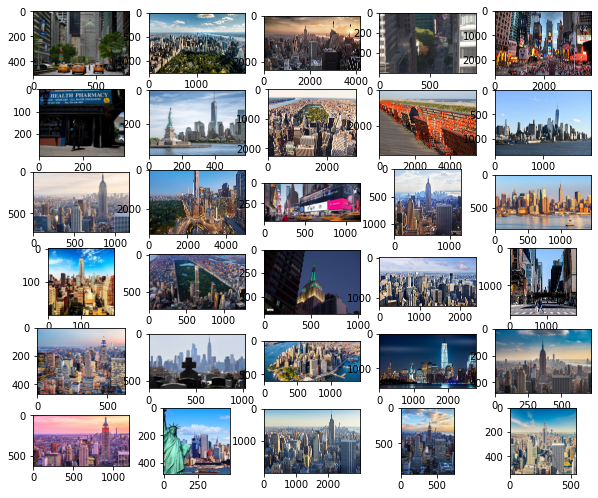

In [0]:
plt.figure(figsize=(10,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    
    plt.imshow(image)

## Webpages as text - articles found with Google search

Code from our [news articles generation project](http://www.aiartonline.com/community/vit-ruzicka-eunsu-kang-david-gordon-ankita-patel-jacqui-fashimpaur-manzil-zaheer/) with article scraping code: https://github.com/previtus/fake_news_generation_mark_I

In [0]:
!pip install newspaper3k

In [0]:
# https://github.com/abenassi/Google-Search-API
!pip install Google-Search-API

In [0]:
import newspaper
from newspaper import Article
from newspaper import ArticleException
from google import google
import requests
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import json
import os
from datetime import datetime

def articleName(author, title, date):
    authorName = author
    if (authorName == None):
        authorName = 'NOAUTHOR'
    else:
        authorName = authorName.replace(' ', '_')
        authorName = authorName.replace('?', '')
    
    titleName = title
    if (titleName == None):
        titleName = 'NOTITLE'
    else:
        titleName = titleName.replace(':', '_')
        titleName = titleName.replace(';', '_')
        titleName = titleName.replace(r'.,', '_')
        titleName = titleName.replace(' ', '_')
        titleName = titleName.replace('?', '')
        titleName = titleName.replace('"', "'")
        titleName = titleName.replace('*', '')
        titleName = titleName.replace('/', '_')
        titleName = titleName.replace('|', '')
        titleName = titleName.replace('$', '')
        titleName = titleName.replace('^', '')
        titleName = titleName.replace('>', '')
        titleName = titleName.replace('<', '')
        titleName = titleName.replace(r'\\\//|<>', '')
    if (date == None):
        dateName = 'NODATE'
    else:
        if(type(date) == str):
            dateName = date
        else:
            dateName = str(date.date())
    delimiter = '$$$$$'
    return authorName + delimiter + titleName + delimiter + dateName + '.json'

In [0]:
!mkdir articles

In [0]:
root_urls = []
queries = ["new york, new york city"]
folder = "articles"

In [0]:
# Getting article URLs!

for quer in queries:
    num_page = 10
    search_results = google.search(quer, num_page)
    if(len(search_results) == 0): continue
    search_res = search_results[0]
    print(search_res)
    print(type(search_res))
    print(type(search_results))
    root_urls.append(search_results)
    #root_urls.append([searchres.link for inter_result in search_results for searchres in inter_result])

GoogleResult(name=New York City - TripAdvisorwww.tripadvisor.com > Touris..
             description=New York City Tourism: Tripadvisor has 4231728 re..
<class 'google.modules.standard_search.GoogleResult'>
<class 'list'>


In [0]:
root_urls = [url for urls in root_urls for url in urls]

In [0]:
for url in root_urls:
    print(url)

In [0]:
root_urls = [root_url.link for root_url in root_urls]
print(root_urls)
print(len(root_urls))

['https://www.tripadvisor.com/Tourism-g60763-New_York_City_New_York-Vacations.html', 'https://www.nytimes.com/2020/05/21/nyregion/coronavirus-ny-update.html', 'https://nypost.com/2020/05/20/end-new-york-citys-lockdown-now/', 'https://theculturetrip.com/north-america/usa/new-york/new-york-city/', 'https://www.timeout.com/newyork', 'https://www.vulture.com/article/real-housewives-of-new-york-city-recap-season-12-episode-8.html', 'https://newyorknewyork.mgmresorts.com/en.html', 'https://www.ny.gov/counties/new-york', 'https://www.amny.com/', 'https://www.cntraveler.com/destinations/new-york-city', 'https://vote.nyc/', 'https://www.nypl.org/', 'https://www.columbia.edu/', 'https://abc7ny.com/health/2-out-of-3-covid-19-indicators-up-slightly-mayor-de-blasio-says/6021383/', 'https://gothamist.com/', 'https://www.earthcam.com/usa/newyork/timessquare/', 'https://nymag.com/', 'https://www.foxnews.com/category/us/new-york-city', 'https://www.theatlantic.com/ideas/archive/2020/05/sorry-haters-new

In [0]:
root_urls = [url for url in root_urls if "tripadvisor" not in url] # throw away tripadvisor/wikipedia pages (optional ...)
print(root_urls)
print(len(root_urls))

['https://www.nytimes.com/2020/05/21/nyregion/coronavirus-ny-update.html', 'https://nypost.com/2020/05/20/end-new-york-citys-lockdown-now/', 'https://theculturetrip.com/north-america/usa/new-york/new-york-city/', 'https://www.timeout.com/newyork', 'https://www.vulture.com/article/real-housewives-of-new-york-city-recap-season-12-episode-8.html', 'https://newyorknewyork.mgmresorts.com/en.html', 'https://www.ny.gov/counties/new-york', 'https://www.amny.com/', 'https://www.cntraveler.com/destinations/new-york-city', 'https://vote.nyc/', 'https://www.nypl.org/', 'https://www.columbia.edu/', 'https://abc7ny.com/health/2-out-of-3-covid-19-indicators-up-slightly-mayor-de-blasio-says/6021383/', 'https://gothamist.com/', 'https://www.earthcam.com/usa/newyork/timessquare/', 'https://nymag.com/', 'https://www.foxnews.com/category/us/new-york-city', 'https://www.theatlantic.com/ideas/archive/2020/05/sorry-haters-new-york-wont-die/611851/', 'https://opendata.cityofnewyork.us/', 'https://patch.com/ne

In [0]:
# Demo purposes:
root_urls = root_urls[0:2]

PS: This code works as a spider, jumps around URLs and gets whatever it can. So ...

*   a.) we have to stop it at some moment ...
*   and b.) there might be a lot of junk when it's done!

In [0]:
from json import JSONDecodeError
from requests.exceptions import Timeout

visited_urls = set([])
saved_articles = set([])
article_lengths = dict([])

while(True):
    if(len(root_urls) == 0):
        break
    root_url = root_urls[0]
    root_urls = root_urls[1:]
    #print(root_urls)
    if (root_url in visited_urls):
        continue
    else:
        visited_urls.add(root_url)
    root_paper = newspaper.build(root_url)
    print(root_url, 'size:', root_paper.size())
    print('category urls count:', len(root_paper.category_urls()))
    adjacent_urls = root_paper.category_urls()
    for adj_url in adjacent_urls:
        if (adj_url in visited_urls):
            continue
        root_urls.append(adj_url)
        #print(root_urls)
    index = 0
    visited_streak = 0
    for carticle in root_paper.articles:
        if (visited_streak > 26):
            break
        article = Article(carticle.url)
        try:
            article.download()
            article.parse()
            
            article_name = articleName(None if article.authors == [] else article.authors[0], article.title, article.publish_date)
            
            if(article_name in saved_articles and len(article.text) <= article_lengths[article_name]):
                print('skipping article')
                visited_streak += 1
                continue
            visited_streak = 0
            article.nlp()
            saved_articles.add(article_name)
            article_lengths[article_name] = (len(article.text))
            payload = {"url": article.url, "title": article.title, "content": article.text}
            features = {"content" : {"keywords": [{"keyword": word} for word in article.keywords]}}
            
            articleJSON = {"features":features, "url":article.url, "date":article.publish_date, "title":article.title, "authors":article.authors, "body":article.text}
            with open(folder+"/"+article_name, 'w') as outfile:
                json.dump(articleJSON, outfile, indent=2, default=str)
                print("saved article")
        except ArticleException:
            continue
        except FileNotFoundError:
            continue
        except OSError:
            continue
        except UnicodeError:
            continue
        except Exception:
            continue
        index += 1
    print(index)

In [0]:
!ls articles -luah

total 352K
drwxr-xr-x 2 root root  16K May 22 11:14  .
drwxr-xr-x 1 root root 4.0K May 22 11:12  ..
-rw-r--r-- 1 root root 1.3K May 22 11:13 'Adam_Nagourney$$$$$Two_Very_Different_Democrats__What_a_Biden-Warren_Ticket_Might_Be_Like$$$$$2020-05-22.json'
-rw-r--r-- 1 root root 3.0K May 22 11:13 'Alan_Feuer$$$$$6_Takeaways_From_Michael_Cohen’s_Guilty_Plea$$$$$2018-08-21.json'
-rw-r--r-- 1 root root 2.0K May 22 11:13 'Apoorva_Mandavilli$$$$$Infected_but_Feeling_Fine__The_Unwitting_Coronavirus_Spreaders$$$$$2020-03-31.json'
-rw-r--r-- 1 root root 1.6K May 22 11:13 'Carl_Hulse$$$$$Why_Clean_Shirts_Become_the_Stuff_of_Dirty_Laundry$$$$$2020-05-19.json'
-rw-r--r-- 1 root root 5.1K May 22 11:13 'Christina_Veiga$$$$$All_NYC_public_school_families_will_receive_food_benefits_for_coronavirus_relief$$$$$2020-05-20.json'
-rw-r--r-- 1 root root 2.0K May 22 11:13 'Corey_Kilgannon$$$$$Beach_Towns_Have_a_Message_for_New_York_City_Residents__Go_Away$$$$$2020-05-22.json'
-rw-r--r-- 1 root root 1.7K May 22 

In [0]:
file_example = "articles/Niraj_Chokshi$$$$$Getting_on_a_Plane_Please_Take_the_Food_Out_of_Your_Bag$$$$$2020-05-21.json"
with open(file_example) as json_file:
    data = json.load(json_file)
    json_formatted_str = json.dumps(data, indent=2)

print(json_formatted_str)

{
  "features": {
    "content": {
      "keywords": [
        {
          "keyword": "surfaces"
        },
        {
          "keyword": "window"
        },
        {
          "keyword": "wipes"
        },
        {
          "keyword": "wipe"
        },
        {
          "keyword": "food"
        },
        {
          "keyword": "clean"
        },
        {
          "keyword": "bag"
        },
        {
          "keyword": "seat"
        },
        {
          "keyword": "seats"
        },
        {
          "keyword": "hands"
        },
        {
          "keyword": "protect"
        },
        {
          "keyword": "plane"
        },
        {
          "keyword": "getting"
        },
        {
          "keyword": "hard"
        }
      ]
    }
  },
  "url": "https://www.nytimes.com/2020/05/21/business/memorial-day-travel-2020-coronavirus.html",
  "date": "2020-05-21 00:00:00",
  "title": "Getting on a Plane? Please Take the Food Out of Your Bag",
  "authors": [
    "Nir